# Loan Status

# Importing Libraries

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Reading Dataset

In [2]:
df=pd.read_csv("ML8 Naive Bayes Loan Status.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default


### Getting Information of Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  int64  
 3   BILL_AMT1       27992 non-null  float64
 4   BILL_AMT2       27494 non-null  float64
 5   BILL_AMT3       27130 non-null  float64
 6   BILL_AMT4       26805 non-null  float64
 7   BILL_AMT5       26494 non-null  float64
 8   BILL_AMT6       25980 non-null  float64
 9   PAY_AMT1        24751 non-null  float64
 10  PAY_AMT2        24604 non-null  float64
 11  PAY_AMT3        24032 non-null  float64
 12  PAY_AMT4        23592 non-null  float64
 13  PAY_AMT5        23297 non-null  float64
 14  PAY_AMT6        22827 non-null  float64
 15  Default Status  30000 non-null  object 
dtypes: float64(13), int64(2), object(1)
memory usage: 3.7+ MB


In [5]:
# df.profile_report(title='report')

### Description of Dataset

In [6]:
df.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,27992.000000,27494.000000,27130.000000,26805.000000,26494.000000,25980.000000,24751.000000,2.460400e+04,24032.000000,23592.000000,23297.000000,22827.000000
mean,10666.660700,14.648867,32.427900,33989.494570,33938.750418,32617.867011,30709.504160,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
std,9698.091793,189.496507,12.718991,61569.150299,60904.557498,58654.145088,54827.113904,51729.302253,51625.821980,12548.633278,1.849890e+04,12242.048527,11056.957868,11071.445005,13358.162766
min,1.000000,1.000000,3.000000,-154973.000000,-69777.000000,-157264.000000,-81334.000000,-81334.000000,-94625.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,1850.500000,4.000000,26.000000,1574.000000,1556.000000,1534.000000,1433.000000,1327.000000,1261.000000,15.000000,1.400000e+01,8.000000,6.000000,5.000000,5.000000
50%,7483.500000,9.000000,33.000000,8551.500000,8697.500000,8889.500000,8671.000000,8131.500000,7819.000000,166.000000,1.640000e+02,119.000000,75.000000,75.000000,78.000000
75%,18746.250000,21.000000,41.000000,38251.750000,38605.500000,36534.250000,32855.000000,29680.500000,29459.750000,1667.000000,1.662000e+03,1381.250000,983.000000,982.000000,1133.000000
max,29999.000000,32768.000000,79.000000,964511.000000,983931.000000,693131.000000,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,417588.000000,528897.000000,426529.000000,528666.000000


### Checking for null Value

In [7]:
df.isna().sum()

ID                   0
LIMIT_BAL            0
AGE                  0
BILL_AMT1         2008
BILL_AMT2         2506
BILL_AMT3         2870
BILL_AMT4         3195
BILL_AMT5         3506
BILL_AMT6         4020
PAY_AMT1          5249
PAY_AMT2          5396
PAY_AMT3          5968
PAY_AMT4          6408
PAY_AMT5          6703
PAY_AMT6          7173
Default Status       0
dtype: int64

In [8]:
df.isna().mean()

ID                0.000000
LIMIT_BAL         0.000000
AGE               0.000000
BILL_AMT1         0.066933
BILL_AMT2         0.083533
BILL_AMT3         0.095667
BILL_AMT4         0.106500
BILL_AMT5         0.116867
BILL_AMT6         0.134000
PAY_AMT1          0.174967
PAY_AMT2          0.179867
PAY_AMT3          0.198933
PAY_AMT4          0.213600
PAY_AMT5          0.223433
PAY_AMT6          0.239100
Default Status    0.000000
dtype: float64

### Removing Null Values

In [9]:
l=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [10]:
for i in l:
    df[i]=df[i].fillna(df[i].mean())

In [11]:
df.isna().mean()

ID                0.0
LIMIT_BAL         0.0
AGE               0.0
BILL_AMT1         0.0
BILL_AMT2         0.0
BILL_AMT3         0.0
BILL_AMT4         0.0
BILL_AMT5         0.0
BILL_AMT6         0.0
PAY_AMT1          0.0
PAY_AMT2          0.0
PAY_AMT3          0.0
PAY_AMT4          0.0
PAY_AMT5          0.0
PAY_AMT6          0.0
Default Status    0.0
dtype: float64

### Droping Unwanted Columns

In [12]:
df=df.drop('ID',axis=1)

In [13]:
df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,2.0,24,3913.0,312.0,689.0,30709.50416,29015.123424,28526.276559,2613.957537,689.0,2584.508988,2250.186122,2300.375885,2608.76576,Default
1,12.0,26,2682.0,1725.0,2682.0,3272.00000,3455.000000,3261.000000,2613.957537,1.0,1.000000,1.000000,2300.375885,2.00000,Default
2,9.0,34,29239.0,1427.0,13559.0,14331.00000,14948.000000,15549.000000,1518.000000,15.0,1.000000,1.000000,1.000000,5.00000,Not Default
3,5.0,37,4699.0,48233.0,49291.0,28314.00000,28959.000000,29547.000000,2.000000,219.0,12.000000,11.000000,169.000000,1.00000,Not Default
4,5.0,57,8617.0,567.0,35835.0,294.00000,19146.000000,19131.000000,2.000000,36681.0,1.000000,9.000000,689.000000,679.00000,Not Default


### Getting Basic Statistics

In [14]:
df.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,14.648867,32.427900,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
std,189.496507,12.718991,59472.881131,58305.224138,55777.906879,51825.29715,48612.594594,48042.412239,11398.052166,1.675277e+04,10956.873040,9805.177073,9756.444917,11652.208534
min,1.000000,3.000000,-154973.000000,-69777.000000,-157264.000000,-81334.00000,-81334.000000,-94625.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,4.000000,26.000000,1788.000000,1847.750000,1862.000000,1782.00000,1718.000000,1724.000000,21.000000,1.900000e+01,15.000000,13.000000,13.000000,15.000000
50%,9.000000,33.000000,11569.000000,12637.000000,13255.000000,13350.00000,12847.000000,13398.500000,512.000000,5.150000e+02,431.000000,367.000000,387.000000,478.000000
75%,21.000000,41.000000,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
max,32768.000000,79.000000,964511.000000,983931.000000,693131.000000,891586.00000,927171.000000,961664.000000,873552.000000,1.684259e+06,417588.000000,528897.000000,426529.000000,528666.000000


In [15]:
df

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,2.0,24,3913.0,312.0,689.0,30709.50416,29015.123424,28526.276559,2613.957537,689.000000,2584.508988,2250.186122,2300.375885,2608.76576,Default
1,12.0,26,2682.0,1725.0,2682.0,3272.00000,3455.000000,3261.000000,2613.957537,1.000000,1.000000,1.000000,2300.375885,2.00000,Default
2,9.0,34,29239.0,1427.0,13559.0,14331.00000,14948.000000,15549.000000,1518.000000,15.000000,1.000000,1.000000,1.000000,5.00000,Not Default
3,5.0,37,4699.0,48233.0,49291.0,28314.00000,28959.000000,29547.000000,2.000000,219.000000,12.000000,11.000000,169.000000,1.00000,Not Default
4,5.0,57,8617.0,567.0,35835.0,294.00000,19146.000000,19131.000000,2.000000,36681.000000,1.000000,9.000000,689.000000,679.00000,Not Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,22.0,39,188948.0,192815.0,28365.0,884.00000,31237.000000,1598.000000,85.000000,2.000000,53.000000,347.000000,5.000000,1.00000,Not Default
29996,15.0,43,1683.0,1828.0,352.0,8979.00000,519.000000,28526.276559,1837.000000,3526.000000,8998.000000,129.000000,2300.375885,2608.76576,Not Default
29997,3.0,37,3565.0,3356.0,2758.0,2878.00000,2582.000000,19357.000000,2613.957537,2922.761583,22.000000,42.000000,2.000000,31.00000,Default
29998,8.0,41,-1645.0,78379.0,7634.0,52774.00000,11855.000000,48944.000000,859.000000,349.000000,1178.000000,1926.000000,52964.000000,184.00000,Default


### Box Plot of Limit Bal

<AxesSubplot:xlabel='LIMIT_BAL'>

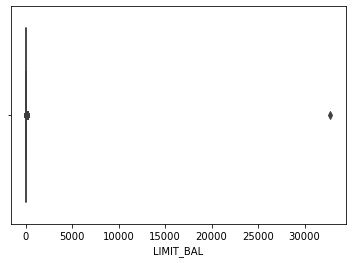

In [16]:
sns.boxplot(data=df,x='LIMIT_BAL')

### Boxplot of Age

<AxesSubplot:xlabel='AGE'>

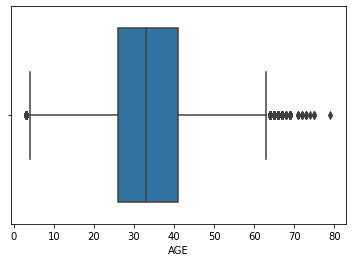

In [17]:
sns.boxplot('AGE',data=df)

## LabelEncoding

In [18]:
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score

In [19]:
le=LabelEncoder()

In [20]:
df['Default Status']=le.fit_transform(df['Default Status'])

### Defining Objects For Features and Target

In [21]:
features=df.drop(['Default Status'],axis=1)

In [22]:
target=df['Default Status']

In [23]:
target.value_counts()

1    23364
0     6636
Name: Default Status, dtype: int64

### Scaling

In [24]:
roscaler=RobustScaler()

In [25]:
col=features.columns

In [26]:
features=roscaler.fit_transform(features)

In [27]:
features=pd.DataFrame(features,columns=col)

### Splitting Data

In [28]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=22)

### Calling Model

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
model=GaussianNB()

In [31]:
model.fit(features_train,target_train)

GaussianNB()

In [32]:
predicted=model.predict(features_test)

### Getting Accuracy Score,Classification Report,Confusion Matrix,Precision And Recall Score

In [33]:
model.score(features_train,target_train)

0.7569166666666667

In [34]:
model.score(features_test,target_test)

0.767

In [35]:
precision_score(target_test,predicted)

0.784639069449196

In [36]:
recall_score(target_test,predicted)

0.9705882352941176

In [37]:
print(classification_report(target_test,predicted))

              precision    recall  f1-score   support

           0       0.10      0.01      0.02      1274
           1       0.78      0.97      0.87      4726

    accuracy                           0.77      6000
   macro avg       0.44      0.49      0.44      6000
weighted avg       0.64      0.77      0.69      6000



<AxesSubplot:>

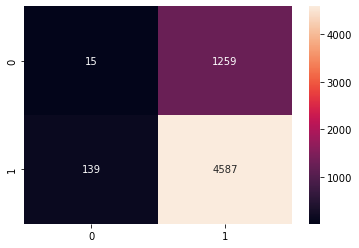

In [38]:
sns.heatmap(confusion_matrix(target_test,predicted),annot=True,fmt='d')

## Applying all Algorithm

In [39]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [40]:
models={'lr':LogisticRegression(),
        'sg':SGDClassifier(),
        'tree':DecisionTreeClassifier(),
        'rf':RandomForestClassifier(),
        'gb':GradientBoostingClassifier(),
        'knn':KNeighborsClassifier(),
        'svm':SVC(),
        'ad':AdaBoostClassifier(),
        'nb':GaussianNB(),
        'lda':LinearDiscriminantAnalysis(),
        'qda':QuadraticDiscriminantAnalysis()
       }

In [41]:
for name, model in models.items():
    model1=model.fit(features_train,target_train)
    y_pred = model1.predict(features_test)
    print(f"{name} confuion matrix: \n {confusion_matrix(target_test,y_pred)}") 
    print(f'{name} accuracy score: {model1.score(features_test,target_test)}')
    print(f'{name} precision score: {precision_score(target_test,y_pred)}')
    print(f'{name} recall score: {recall_score(target_test,y_pred)}')
    print(f'{name} classification report :\n {classification_report(target_test,y_pred)}\n\n')

lr confuion matrix: 
 [[   0 1274]
 [   0 4726]]
lr accuracy score: 0.7876666666666666
lr precision score: 0.7876666666666666
lr recall score: 1.0
lr classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1274
           1       0.79      1.00      0.88      4726

    accuracy                           0.79      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.62      0.79      0.69      6000



sg confuion matrix: 
 [[ 131 1143]
 [ 475 4251]]
sg accuracy score: 0.7303333333333333
sg precision score: 0.7880978865406006
sg recall score: 0.899492170969107
sg classification report :
               precision    recall  f1-score   support

           0       0.22      0.10      0.14      1274
           1       0.79      0.90      0.84      4726

    accuracy                           0.73      6000
   macro avg       0.50      0.50      0.49      6000
weighted avg       0.67      0.73  

## Random forest,Knn and SGDCClassifire gives est Accuracy